In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
student_data=pd.read_csv(r'C:\Users\Sushant\Downloads\archive\student_data.csv')

In [3]:
median = student_data['age'].median()
median_absolute_deviation = np.median(np.abs(student_data['age'] - median))
threshold = 3.5 * median_absolute_deviation

# Replace outliers with the median
student_data['age'] = np.where(np.abs(student_data['age'] - median) > threshold, median, student_data['age'])

In [4]:
student_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16.0,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20.0,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17.0,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,17.0,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18.0,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
print(student_data.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [6]:
mean = student_data['age'].mean()
std_dev = student_data['age'].std()
threshold_mean = 3 * std_dev

# Replace outliers with the mean
student_data['age'] = np.where(np.abs(student_data['age'] - mean) > threshold_mean, mean, student_data['age'])

In [7]:
from scipy.stats import zscore

# Identify and replace outliers using Z-score
z_scores = zscore(student_data['age'])
threshold_z = 3

# Replace outliers with NaN, you can replace with mean or median as well
student_data['age'] = np.where(np.abs(z_scores) > threshold_z, np.nan, student_data['age'])
student_data['age'].fillna(student_data['age'].mean(), inplace=True)

In [9]:
plt.figure(figsize=(18,6))
plt.show()

<Figure size 1800x600 with 0 Axes>

Text(0.5, 1.0, 'Original age Distribution')

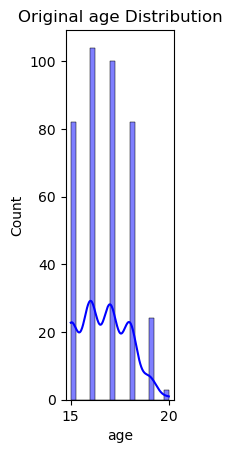

In [10]:
plt.subplot(1, 4, 1)
sns.histplot(student_data['age'], bins=20, kde=True, color='blue')
plt.title('Original age Distribution')


Text(0.5, 1.0, 'Age after Median-based Anomaly Detection')

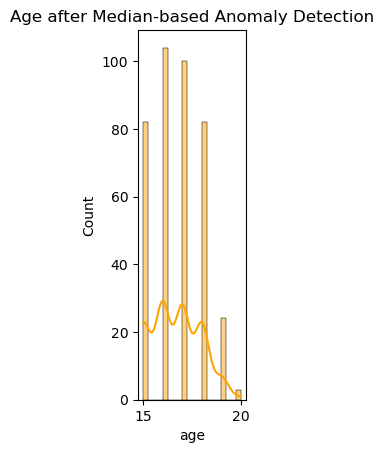

In [17]:
plt.subplot(1, 4, 2)
sns.histplot(student_data['age'], bins=20, kde=True, color='orange')
plt.title('Age after Median-based Anomaly Detection')

Text(0.5, 1.0, 'age after Mean-based Anomaly Detection')

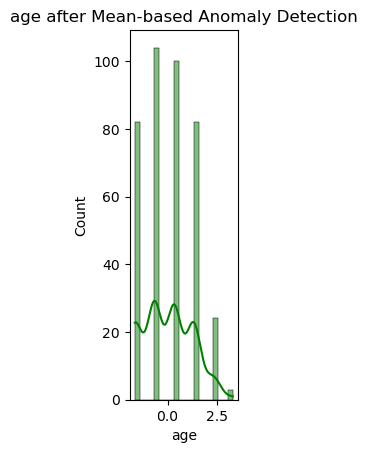

In [21]:
plt.subplot(1, 4, 3)
sns.histplot(student_data['age']-mean, bins=20, kde=True, color='green')
plt.title('age after Mean-based Anomaly Detection')

Text(0.5, 1.0, 'age after Z-score-based Anomaly Detection')

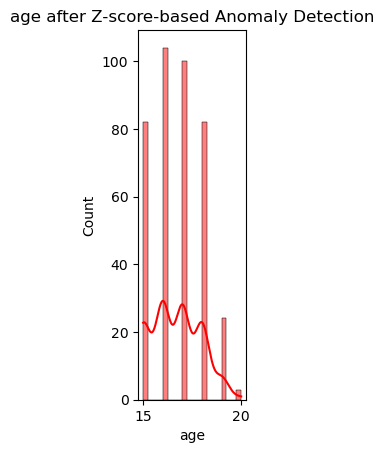

In [22]:
plt.subplot(1, 4, 4)
sns.histplot(student_data['age'], bins=20, kde=True, color='red')
plt.title('age after Z-score-based Anomaly Detection')


In [23]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>